# The Spark Foundation

## Data Science and Business Analytics Internship


### Task #2 : Prediction using Unsupervised ML

#### Author : Supriya Nagpal

#### Problem: Predict the optimum number of clusters and represent it visually, from the given 'Iris' dataset.

#### Dataset : https://bit.ly/3kXTdox

### 1. Import Required Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### 2. Read and Clean Data

In [2]:
#Location of Data required

path = r"Iris.csv"
i_data = pd.read_csv(path)

In [3]:
i_data.info() #Information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
i_data.head() #Shows only first 5 rows of the data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
i_data.tail() ##Shows only last 5 rows of the data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
i_data #Shows the full data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
i_data.shape #Gives number of rows and columns

(150, 6)

In [8]:
i_data.drop('Id', axis = 1, inplace = True) #Drops the specific column
i_data.columns #Tells the name of remaining columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
i_data.isnull().sum() #To check null value

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
i_data.duplicated().sum() #To check duplicate value

3

In [11]:
i_data.drop_duplicates(inplace = True) #Drops the rows with similar entries
i_data.shape #Gives number of rows and columns

(147, 5)

In [12]:
i_data #Shows the full data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


The number of rows left is 147 as 3 rows had similar entries

In [13]:
i_data.describe() #Inform about important statistical terms depending on Data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
i_data.corr() #Correlation

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


### 3. Numeric Data for Outliers

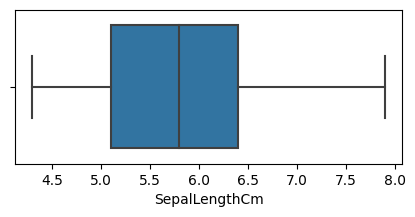

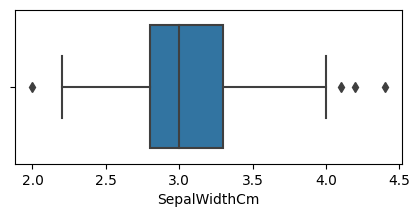

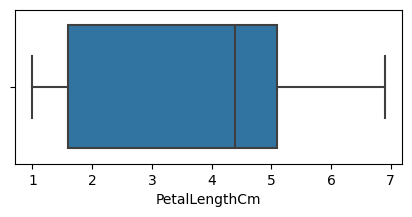

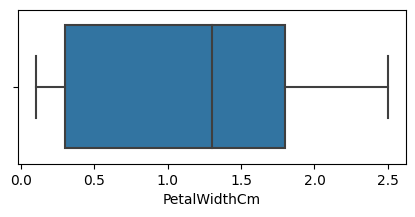

In [15]:
## Check for any outliers in the numeric data

for i in i_data.columns:
    if i_data[i].dtype == 'float64':
        plt.figure(figsize = (5,2))
        sns.boxplot(x = i_data[i])
        plt.show()

In [16]:
#Outliers in Sepalwidth column
#Use IQR method to identify qutliers
#Formula for IQR : IQR = Q3 - Q1
#Formula for applying Upper and Lower Fence : Upper_Fence = Q3 + 1.5 * IQR; Lower_Fence = Q1 - 1.5 * IQR

Q_1, Q_3 = np.percentile(i_data['SepalWidthCm'],[25,75])

Iqr = Q_3 - Q_1
Upper_Fence = Q_3 + (1.5 * Iqr)
Lower_Fence = Q_1 - (1.5 * Iqr)

i_data['SepalWidthCm'] = i_data['SepalWidthCm'].apply(lambda x: Upper_Fence if x > Upper_Fence else Lower_Fence if x < Lower_Fence else x)

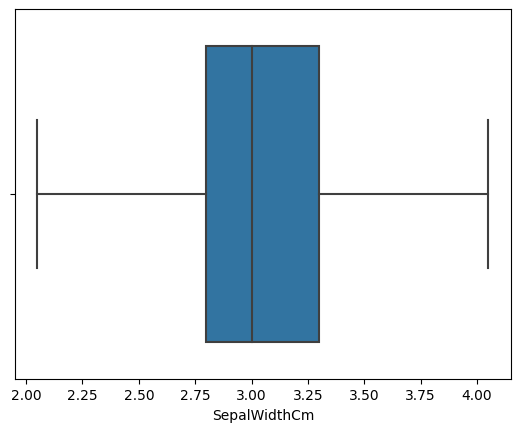

In [17]:
sns.boxplot(x = i_data['SepalWidthCm']);

### 4. Data Understanding

In [18]:
i_data.Species.unique() #Inform Species name

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [19]:
#Target Class

print(i_data.Species.value_counts())

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64


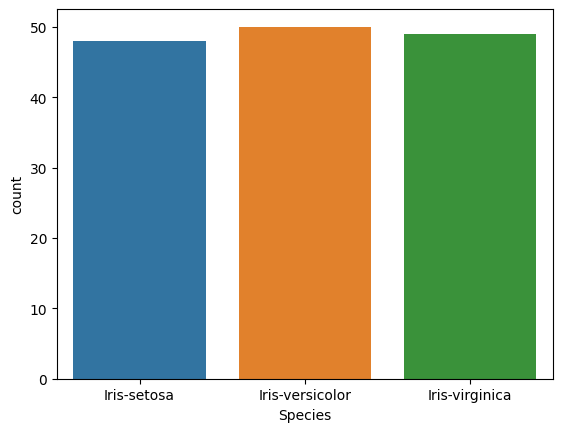

In [20]:
sns.countplot(x=i_data.Species);

### 5. Visualize Data

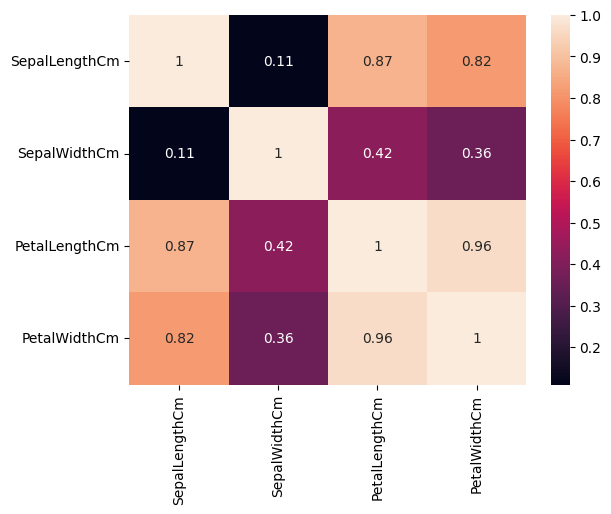

In [21]:
sns.heatmap(abs(i_data.corr()), annot = True); #Visualizing correlation among features of species

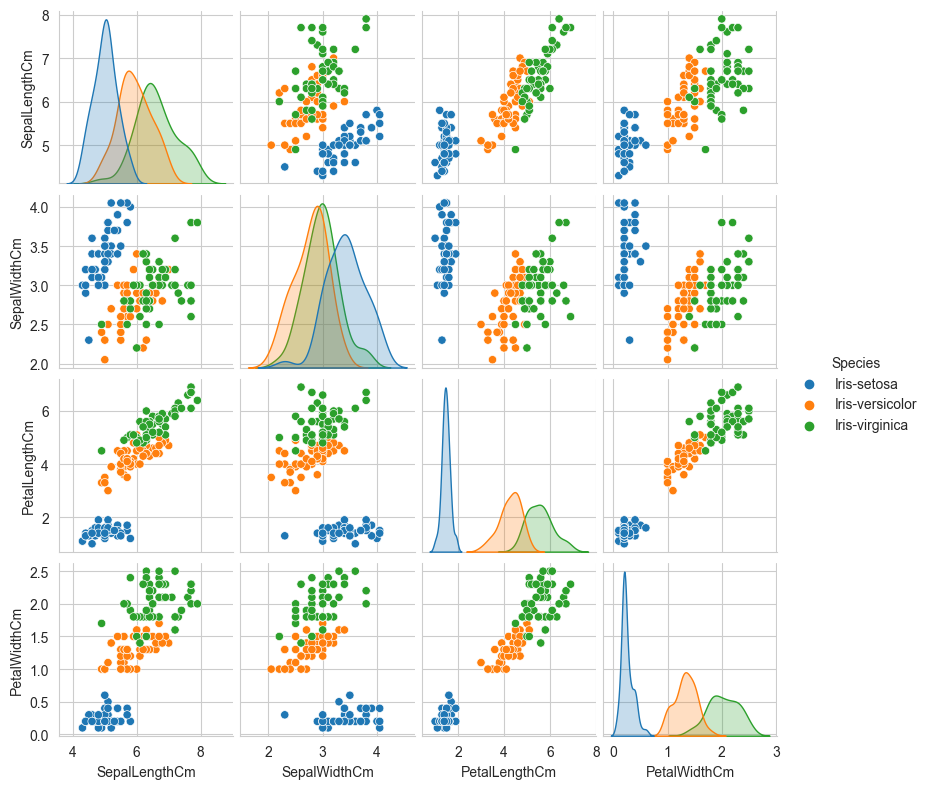

In [22]:
#Visualizing relation among features of Species

sns.set_style("whitegrid");
sns.pairplot(i_data, hue = "Species", height = 2);
plt.show()

### 6. Cluster

In [23]:
#using Elbow Method

Clus = range(1, 10)
inertias = []
x = i_data.iloc[:, [0,1,2,3]].values

for k in Clus:
    Model = KMeans(n_clusters = k) #Create model KMeasn with k cluster
    Model.fit(x) #fitting model
    inertias.append(Model.inertia_) #Append the list of inertias

In [24]:
pd.DataFrame({'Cluster' : range(1,10), 'inertias' : inertias})

,Cluster,inertias
0,1,662.549320
1,2,150.784294
2,3,77.013004
3,4,55.746783
4,5,44.924395
5,6,37.747083
6,7,33.431193
7,8,29.153595
8,9,27.486129


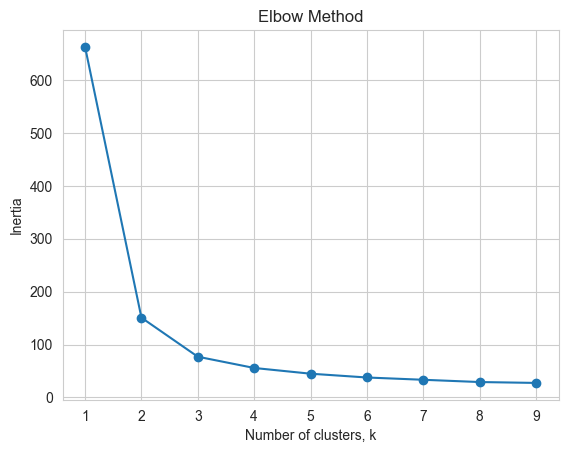

In [25]:
#Plot graph Clus vs inertias

plt.plot(Clus, inertias, '-o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(Clus)
plt.show()

The graph show if number of clusters, k increase then the inertia decreases.

In [26]:
KM = KMeans(n_clusters = 3)

KM.fit(x)

KMeans(n_clusters=3)

In [27]:
KM.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.01041667, 3.41979167, 1.4625    , 0.25      ],
       [5.90327869, 2.75      , 4.38196721, 1.42622951]])

In [28]:
KM.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2])

In [29]:
i_data['Cluster'] = KM.labels_ #Labeling column for KM values
i_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


In [30]:
display(i_data['Cluster'].value_counts(), i_data['Species'].value_counts())

2    61
1    48
0    38
Name: Cluster, dtype: int64

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

### 7. Visualize Cluster on Data

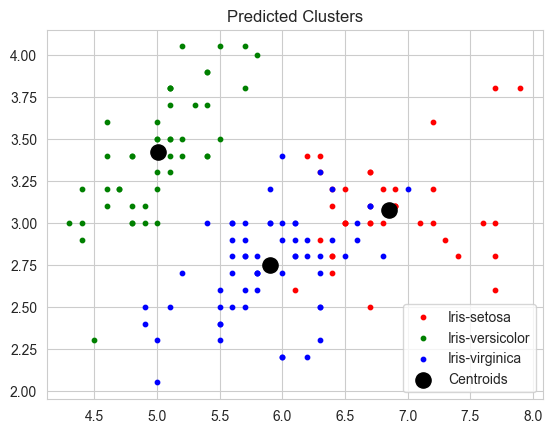

In [31]:
#Calculate cluster labels

Labels = KM.predict(x)

#Visualize clusters

plt.scatter(x[Labels == 0,0], x[Labels == 0,1], s = 10, c = 'red', label = 'Iris-setosa')
plt.scatter(x[Labels == 1,0], x[Labels == 1,1], s = 10, c = 'green', label = 'Iris-versicolor')
plt.scatter(x[Labels == 2,0], x[Labels == 2,1], s = 10, c = 'blue', label = 'Iris-virginica')

#Plot centroids of clusters

plt.scatter(KM.cluster_centers_[:,0], KM.cluster_centers_[:,1], s = 120, c = 'black', label = 'Centroids')
plt.title('Predicted Clusters')
plt.legend()
plt.show()

In [32]:
i_data.loc[i_data['Species'] == 'Iris-setosa']['Cluster'].value_counts() #Identify Iris-setosa at 100% accuracy level

1    48
Name: Cluster, dtype: int64

In [33]:
i_data.loc[i_data['Species'] == 'Iris-versicolor']['Cluster'].value_counts() #Identify Iris-setosa at 100% accuracy level

2    48
0     2
Name: Cluster, dtype: int64

In [34]:
i_data.loc[i_data['Species'] == 'Iris-virginica']['Cluster'].value_counts() #Identify Iris-setosa at 100% accuracy level

0    36
2    13
Name: Cluster, dtype: int64

In [35]:
#Applying Codes to the Species for easily classifing in further evaluation

i_data['Species_Encoded'] = i_data['Species'].apply(lambda x : 1 if x == 'Iris-setosa' else 2 if x == 'Iris-virginica' else 0)
i_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster,Species_Encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2,2
147,6.5,3.0,5.2,2.0,Iris-virginica,0,2
148,6.2,3.4,5.4,2.3,Iris-virginica,0,2


### 8. Accuracy and Evaluation

In [36]:
print(classification_report(i_data['Species_Encoded'],i_data['Cluster'])) #Classify data

              precision    recall  f1-score   support

           0       0.05      0.04      0.05        50
           1       1.00      1.00      1.00        48
           2       0.21      0.27      0.24        49

    accuracy                           0.43       147
   macro avg       0.42      0.44      0.43       147
weighted avg       0.42      0.43      0.42       147



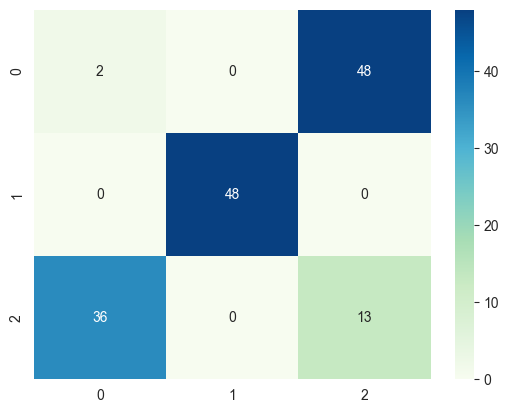

In [37]:
sns.heatmap(confusion_matrix(i_data['Species_Encoded'], i_data['Cluster']), cmap = 'GnBu', annot = True); #How much predictions are done rightly 